In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm,colors,gridspec
import xarray as xr
import numpy as np
import os

In [2]:
USER = os.environ['USER']
var = 'Phi'
layer1 = '0-200m'
layer2 = '200-600m'

In [3]:
datadir = f'/glade/scratch/{USER}/DPLE-results'
filename = f'{datadir}/DPLE_LME_box01-11_ACC_RMSE_{var}_{layer1}_leadyear_1-10.nc'
ds1 = xr.open_dataset(filename)
filename = f'{datadir}/DPLE_LME_box01-11_ACC_RMSE_{var}_{layer2}_leadyear_1-10.nc'
ds2 = xr.open_dataset(filename)

In [4]:
corr_p1 = ds1['corr_p'].values
rcri_p1 = ds1['rcri_p'].values
corr_d1 = ds1['corr_d'].values
rcri_d1 = ds1['rcri_d'].values
corr131 = ds1['corr13'].values
rcri131 = ds1['rcri13'].values
nmae_p1 = ds1['nmae_p'].values
nmae_d1 = ds1['nmae_d'].values

In [5]:
corr_p2 = ds2['corr_p'].values
rcri_p2 = ds2['rcri_p'].values
corr_d2 = ds2['corr_d'].values
rcri_d2 = ds2['rcri_d'].values
corr132 = ds2['corr13'].values
rcri132 = ds2['rcri13'].values
nmae_p2 = ds2['nmae_p'].values
nmae_d2 = ds2['nmae_d'].values

## Plot the Corr Matrix for Persistence

In [6]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
#csfont = {'fontname':'Times New Roman'}
lme = [1,2,3,4,5,6,7,8,9,10,65]
xx = np.arange(1, len(lme)+1);yy = np.arange(1,11)
#xx, yy = np.meshgrid(xx, yy)
labb = ['a','b','c','d','e','f','g','h','i']
#cot = ['West Coast LMEs', 'South Coast/Subtropical LMEs', 'Northeast Coast LMEs']
cota = ['0-200 m', '200-600 m']
cot = ['Persistence', 'DPLE', r'$\Delta$NMAE']
boxna = ['01-EBS','02-GoA','03-CC','04-GoC','05-GoM','06-SEUS','07-NEUS','08-SS','09-LN','10-IPH','11-AI']
#cols = ['magenta','dodgerblue','mediumseagreen','magenta','dodgerblue','mediumseagreen','dodgerblue','mediumseagreen','orangered','orangered','orangered']
cols = ['red','chocolate','darkorange','gold','green','lime','royalblue','purple','magenta','cyan','maroon']
#cols = ['purple','magenta','royalblue','dodgerblue','cyan','forestgreen','limegreen','yellowgreen','darkorange','red','brown']

In [7]:
fig = plt.figure(figsize=[13, 7])
gs = gridspec.GridSpec(1, 3)
#
import corrstats
lenn = 2007+1-1954
alpha = 0.05
#
for rr,corr_p,rcri_p,corr_d,rcri_d,corr13,rcri13,nmae_p,nmae_d in [[0,corr_p1,rcri_p1,corr_d1,rcri_d1,corr131,rcri131,nmae_p1,nmae_d1],\
                                                                   [1,corr_p2,rcri_p2,corr_d2,rcri_d2,corr132,rcri132,nmae_p2,nmae_d2]]:
    corr = corr_d - corr_p
    nmae = nmae_p - nmae_d
    # Test ACC difference significance
    t_cr, p_cr = corrstats.dependent_corr(corr_p,corr_d,corr13,lenn-1,twotailed=False,method='steiger')
    smask = p_cr<=alpha
    pmask = corr_p >= rcri_p
    dmask = corr_d >= rcri_d
    maskp = corr > 0.
    ##
    ax1 = fig.add_axes([0.07, 0.54-.47*rr, 0.24, 0.42])
    for hh, lmee in [[0, [10,0,1,2]], [1, [3,4,5,9]], [2, [6,7,8]]]:
        for cc, lss in [[1, 'solid']]:#, [4, 'dotted'], [7, 'dashed']]:
            for kk in lmee:
                if cc == 1:
                    cd1 = ax1.plot(yy, nmae_p[cc, kk, :], color=cols[kk], lw=2., linestyle=lss, label=boxna[kk])
                else:
                    cd1 = ax1.plot(yy, nmae_p[cc, kk, :], color=cols[kk], lw=2., linestyle=lss)
                cd1 = ax1.plot(yy, nmae_p[cc, kk, :], color=cols[kk], marker='o', markersize=4)
                yy1 = np.ma.array(yy, mask=~pmask[cc, kk, :])
                aa1 = np.ma.array(nmae_p[cc, kk, :], mask=~pmask[cc, kk, :])
                ax1.scatter(yy1, aa1, s=30, marker='o', color=cols[kk], edgecolor='k', alpha=1, zorder=20)
#
    ax1.set_ylabel('NMAE (%s)' % cota[rr], fontsize=16)
    if rr == 0:
        ax1.legend(bbox_to_anchor=(3.75,-.1,0.1,0.6), fontsize='x-large',ncol=1, handlelength=1.5, labelspacing=.8, columnspacing=.5, framealpha=1., frameon=False, fancybox=False)
    ax1.set_xticks(range(1, 11))
    #ax1.set_xticklabels('')
    ax1.set_xticklabels(['%d' % ii for ii in range(1, 11)],fontsize=14)
    ax1.set_yticks(np.arange(.0,1.6,.2))
    ax1.set_yticklabels(['%.1f' % ii for ii in np.arange(.0,1.6,.2)],fontsize=14)
    #ax1.text(1, -.4, labb[0+rr*3], fontsize=18, fontweight='bold')
    ax1.set_ylim(.0, 1.4)
    if rr == 0:
        ax1.set_title("%s" % (cot[0]), fontsize=16)
    #
    ax2 = fig.add_axes([0.07+0.26, 0.54-.47*rr, 0.24, 0.42])
    for hh, lmee in [[0, [10,0,1,2]], [1, [3,4,5,9]], [2, [6,7,8]]]:
        for cc, lss in [[1, 'solid']]:#, [4, 'dotted'], [7, 'dashed']]:
            for kk in lmee:
                cd1 = ax2.plot(yy, nmae_d[cc, kk, :], color=cols[kk], lw=2., linestyle=lss)
                cd1 = ax2.plot(yy, nmae_d[cc, kk, :], color=cols[kk], marker='o', markersize=4)
                yy1 = np.ma.array(yy, mask=~dmask[cc, kk, :])
                aa1 = np.ma.array(nmae_d[cc, kk, :], mask=~dmask[cc, kk, :])
                ax2.scatter(yy1, aa1, s=30, marker='o', color=cols[kk], edgecolor='k', alpha=1, zorder=20)
    ax2.set_xticks(range(1, 11))
    ax2.set_xticklabels(['%d' % ii for ii in range(1, 11)],fontsize=14)
    #ax2.set_xticklabels('')
    ax2.set_yticks(np.arange(.0,1.6,.2))
    ax2.set_yticklabels('',fontsize=14)
    #ax2.text(1, -.4, labb[1+rr*3], fontsize=18, fontweight='bold')
    ax2.set_ylim(.0, 1.4)
    if rr == 0:
        ax2.set_title("%s" % (cot[1]), fontsize=16)
    #
    ax3 = fig.add_axes([0.11+0.26*2, 0.54-.47*rr, 0.24, 0.42])
    for hh, lmee in [[0, [10,0,1,2]], [1, [3,4,5,9]], [2, [6,7,8]]]:
        for cc, lss in [[1, 'solid']]:#, [4, 'dotted'], [7, 'dashed']]:
            for kk in lmee:
                stddd = corr[:3, kk, :].std(axis=0)*.5
                #ax3.fill_between(yy, corr[cc, kk, :]-stddd, corr[cc, kk, :]+stddd, color=cols[kk], alpha=0.25)
                cd1 = ax3.plot(yy, nmae[cc, kk, :], color=cols[kk], lw=2., linestyle=lss)
                cd1 = ax3.plot(yy, nmae[cc, kk, :], color=cols[kk], marker='o', markersize=4)
                yy1 = np.ma.array(yy, mask=~dmask[cc, kk, :]+~smask[cc, kk, :]+~maskp[cc, kk, :])
                aa1 = np.ma.array(nmae[cc, kk, :], mask=~dmask[cc, kk, :]+~smask[cc, kk, :]+~maskp[cc, kk, :])
                ax3.scatter(yy1, aa1, s=30, marker='o', color=cols[kk], edgecolor='k', alpha=1, zorder=20)
    ax3.set_xticks(range(1, 11))
    ax3.set_xticklabels(['%d' % ii for ii in range(1, 11)],fontsize=14)
    ax3.set_yticks(np.arange(-.4,1.1,.2))
    ax3.set_yticklabels(['%.1f' % ii for ii in np.arange(-.4,1.1,.2)],fontsize=14)
    ax3.set_ylabel(r'$\Delta$NMAE (%s)' % cota[rr], fontsize=16)
    #ax3.text(1, -.6, labb[2+rr*3], fontsize=18, fontweight='bold')
    ax3.set_ylim(-.4, .8)
    if rr == 0:
        ax3.set_title("%s" % (cot[2]), fontsize=16)
    #
    for ax in [ax1, ax2, ax3]:
        #ax.plot([.8, 10.2], [0, 0], lw=1.5, color='k', zorder=2)
        #ax.set_yticks(np.arange(-0.4, 1.1, 0.2))
        if rr == 1:
            ax.set_xlabel('Lead Year', fontsize=14)    
        ax.grid(linestyle='dashed')
        ax.set_xlim(.8, 10.2)

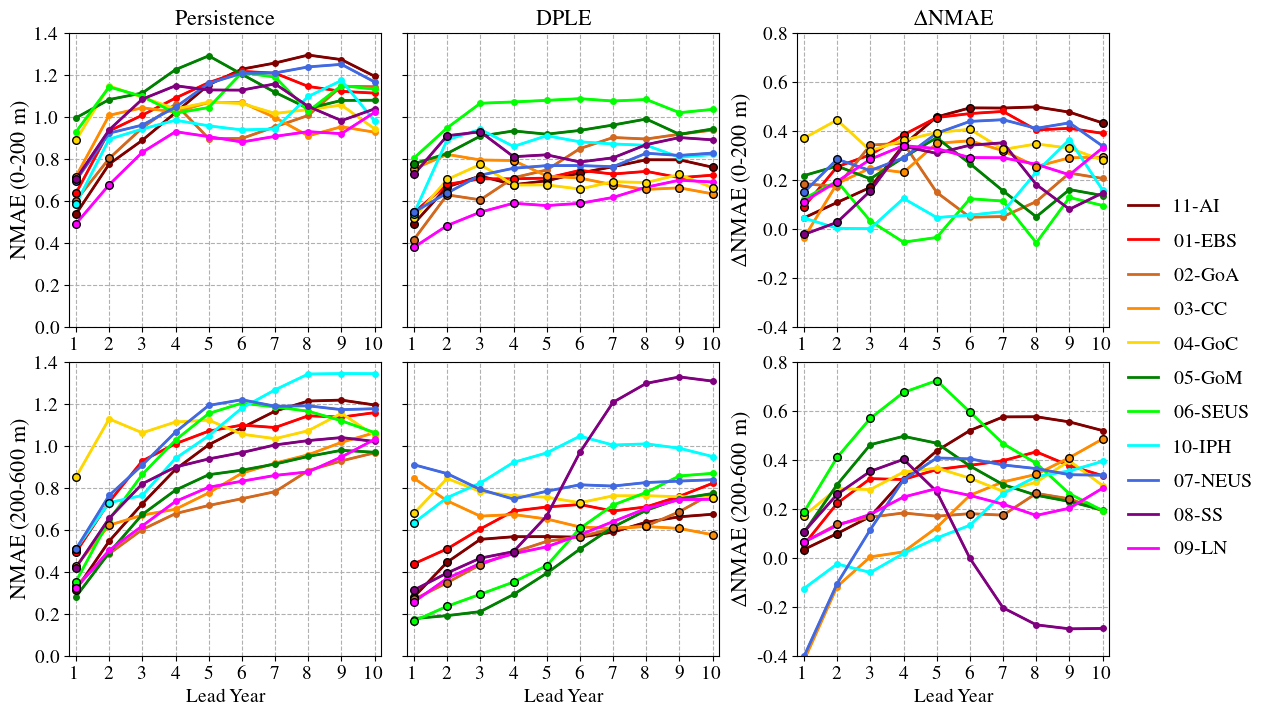

In [8]:
output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/LME_box01-11_persistence_DPLE_diff_NMAE_{var}_{layer1}_{layer2}_leadyear_1-10_lineplot.png'
plt.savefig(outfile,dpi=400)
plt.show()

In [9]:
def array_change(varr):
    nphi,nbox,nlead = np.shape(varr)
    #[0,1,2,3,4,5,6,7,8,9,10]
    #[10,0,1,2,3,4,5,9,6,7,8]
    var1 = varr.copy()
    varr[:,0,:] = var1[:,10,:].copy()
    varr[:,1:7,:] = var1[:,0:6,:].copy()
    varr[:,7,:] = var1[:,9,:].copy()
    varr[:,8:11,:] = var1[:,6:9,:].copy()
    return varr

In [10]:
corr_p1 = array_change(corr_p1)
rcri_p1 = array_change(rcri_p1)
corr_d1 = array_change(corr_d1)
rcri_d1 = array_change(rcri_d1)
corr131 = array_change(corr131)
rcri131 = array_change(rcri131)
nmae_p1 = array_change(nmae_p1)
nmae_d1 = array_change(nmae_d1)
corr_p2 = array_change(corr_p2)
rcri_p2 = array_change(rcri_p2)
corr_d2 = array_change(corr_d2)
rcri_d2 = array_change(rcri_d2)
corr132 = array_change(corr132)
rcri132 = array_change(rcri132)
nmae_p2 = array_change(nmae_p2)
nmae_d2 = array_change(nmae_d2)

In [11]:
cmin = -.25*1.2;cmax = 1.*1.2;clev = 25.
dc = (cmax - cmin)/clev;vcs = np.arange(cmin,cmax+dc,dc)
pal_norms = colors.BoundaryNorm(vcs, ncolors=256, clip = False)
#
xx = np.arange(1, len(lme)+1);yy = np.arange(1,11)
xx, yy = np.meshgrid(xx, yy)
labb = ['a','b','c','d','e','f','g','h','i']
labbb = ['low','medium','high']
labc = ['j','k','l','m','n','o','p','q','r']
lmen = ['AI','EBS','GoA','CC','GoC','GoM','SEUS','IPH','NEUS','SS','LN']

In [12]:
import matplotlib as mpl
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    '''
    https://stackoverflow.com/a/18926541
    '''
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [13]:
new_cmapt = truncate_colormap('RdBu_r', 0.375, 1.0)
new_cmaps = truncate_colormap('PRGn', 0.375, 1.0)

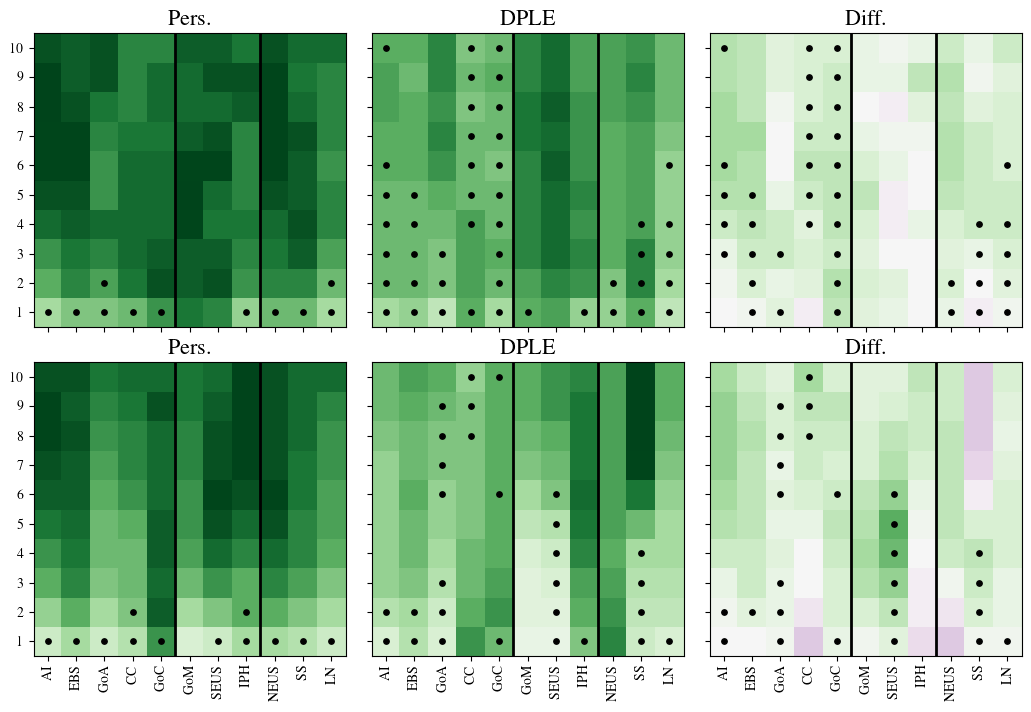

In [15]:
fig = plt.figure(figsize=[13, 7])
gs = gridspec.GridSpec(1, 3)
#
import corrstats
lenn = 2007+1-1954
alpha = 0.05
#
cc = 1
for rr,corr_p,rcri_p,corr_d,rcri_d,corr13,rcri13,nmae_p,nmae_d in [[0,corr_p1,rcri_p1,corr_d1,rcri_d1,corr131,rcri131,nmae_p1,nmae_d1],\
                                                                   [1,corr_p2,rcri_p2,corr_d2,rcri_d2,corr132,rcri132,nmae_p2,nmae_d2]]:
    corr = corr_d - corr_p
    nmae = nmae_p - nmae_d
    # Test ACC difference significance
    t_cr, p_cr = corrstats.dependent_corr(corr_p,corr_d,corr13,lenn-1,twotailed=False,method='steiger')
    smask = p_cr<=alpha
    pmask = corr_p >= rcri_p
    dmask = corr_d >= rcri_d
    maskp = corr > 0.
    ##
    for hh in range(3):
        ax1 = fig.add_axes([0.07+hh*0.26, 0.54-.47*rr, 0.24, 0.42])
        #cd1 = ax1.pcolor(yy, xx, nmae_p[hh].T, shading='nearest', cmap=new_cmaps, norm=pal_norms)
        if hh == 0:
            cd2 = ax1.pcolor(xx, yy, nmae_p[cc].T, shading='nearest', cmap=new_cmaps, norm=pal_norms)
            xx1 = np.ma.array(xx, mask=~pmask[cc].T)
            yy1 = np.ma.array(yy, mask=~pmask[cc].T)
            ax1.scatter(xx1, yy1, s=60, marker='.', color='k', alpha=1)
            ax1.set_title(r"Pers.", fontsize=16)
        elif hh == 1:
            cd2 = ax1.pcolor(xx, yy, nmae_d[cc].T, shading='nearest', cmap=new_cmaps, norm=pal_norms)
            xx1 = np.ma.array(xx, mask=~dmask[cc].T)
            yy1 = np.ma.array(yy, mask=~dmask[cc].T)
            ax1.scatter(xx1, yy1, s=60, marker='.', color='k', alpha=1)
            ax1.set_title(r"DPLE", fontsize=16)
        elif hh == 2:
            cd2 = ax1.pcolor(xx, yy, nmae[cc].T, shading='nearest', cmap=new_cmaps, norm=pal_norms)
            xx1 = np.ma.array(xx, mask=(~dmask[cc]+~smask[cc]+~maskp[cc]).T)
            yy1 = np.ma.array(yy, mask=(~dmask[cc]+~smask[cc]+~maskp[cc]).T)
            ax1.scatter(xx1, yy1, s=60, marker='.', color='k', alpha=1)
            ax1.set_title(r"Diff.", fontsize=16)
        ax1.plot([5.5,5.5],[0.5,10.5],color='k',lw=2.)
        ax1.plot([8.5,8.5],[0.5,10.5],color='k',lw=2.)
        #
        ax1.set_xticks(np.arange(1,12))
        ax1.set_yticks(np.arange(1,11))
        if rr == 1:
            ax1.set_xticklabels(lmen,rotation=90)
        else:
            ax1.set_xticklabels([])
        if hh == 0:
            ax1.set_yticklabels([str(ii) for ii in range(1,11)])
        else:
            ax1.set_yticklabels([])
plt.show()